<a href="https://colab.research.google.com/github/Latebycicle/Cat-Dog-ImageClassifer/blob/main/cat_and_dog_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))
#total_test = sum([len(files) for r, d, files in os.walk(test_dir)])

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_do

In [ ]:

train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

print(type(validation_image_generator))
print(type(test_image_generator))


train_data_gen = train_image_generator.flow_from_directory(
        'cats_and_dogs/train',
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(
        'cats_and_dogs/validation',
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(
        'cats_and_dogs',
        classes = ['test'],
        target_size=(150, 150),
        batch_size=128,
        shuffle=False,
        class_mode='binary')

<class 'keras.src.preprocessing.image.ImageDataGenerator'>
<class 'keras.src.preprocessing.image.ImageDataGenerator'>
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


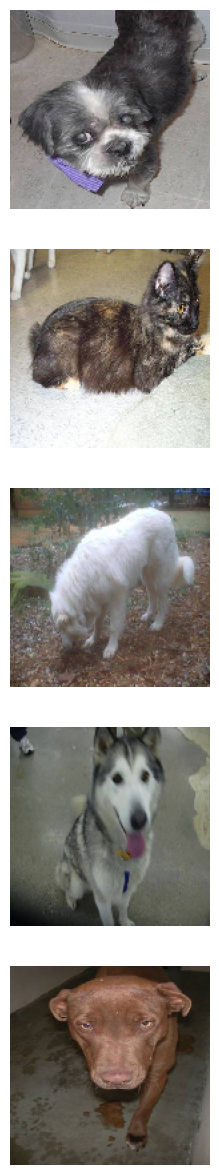

In [ ]:

def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:

train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest',
  rescale=1./255)


Found 2000 images belonging to 2 classes.


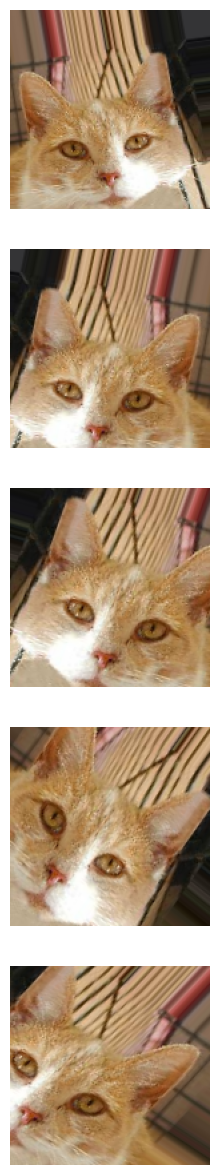

In [ ]:

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(150, 150, 3)))

#testing

#model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

#model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))

#model.add(tf.keras.layers.Flatten())


#model.add(tf.keras.layers.Flatten())

#model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
#model.add(tf.keras.layers.MaxPooling2D(3))

#model.add(tf.keras.layers.GlobalMaxPooling2D())


#model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))
#model.add(tf.keras.layers.Dense(430592, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))

model.add(tf.keras.layers.Dense(2, activation='softmax'))





model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
# 8

#model.fit(train_data_gen, steps_per_epoch= 15, epochs=14, validation_data=val_data_gen, validation_steps=7)

history = model.fit(train_data_gen, steps_per_epoch= 14, epochs=14, validation_data=val_data_gen, validation_steps=7)

Epoch 1/14
14/14 [==============================] - 21s 1s/step - loss: 1.8929 - accuracy: 0.4788 - val_loss: 0.6918 - val_accuracy: 0.5089
Epoch 2/14
14/14 [==============================] - 16s 1s/step - loss: 0.6932 - accuracy: 0.5224 - val_loss: 0.6860 - val_accuracy: 0.5368
Epoch 3/14
14/14 [==============================] - 19s 1s/step - loss: 0.6848 - accuracy: 0.5596 - val_loss: 0.6736 - val_accuracy: 0.6373
Epoch 4/14
14/14 [==============================] - 16s 1s/step - loss: 0.6723 - accuracy: 0.5889 - val_loss: 0.6776 - val_accuracy: 0.5413
Epoch 5/14
14/14 [==============================] - 16s 1s/step - loss: 0.6680 - accuracy: 0.5877 - val_loss: 0.6395 - val_accuracy: 0.6596
Epoch 6/14
14/14 [==============================] - 18s 1s/step - loss: 0.6431 - accuracy: 0.6405 - val_loss: 0.6155 - val_accuracy: 0.6663
Epoch 7/14
14/14 [==============================] - 16s 1s/step - loss: 0.6419 - accuracy: 0.6284 - val_loss: 0.6089 - val_accuracy: 0.6607
Epoch 8/14
14/14 [==

In [1]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



NameError: name 'history' is not defined

1/1 [==============================] - 1s 946ms/step


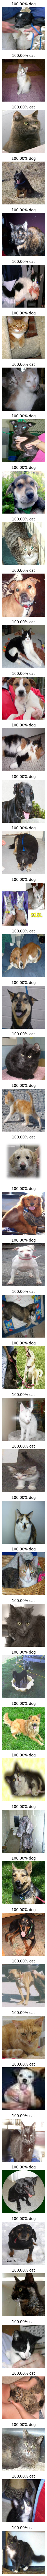

In [ ]:

test_images, _ = next(test_data_gen)
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
plotImages(test_images, probabilities=probabilities)

In [ ]:

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
